In [1]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
from os.path import join, abspath
from os import pardir
import sys
from scipy import interpolate
from glob import glob
from scipy.stats import gaussian_kde

In [2]:
root_dir = abspath(pardir)
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/3_Vertical_Number',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [66]:
from utils import compjk, safe_mkdir

In [4]:
root_data_dir = join(root_dir, 'Data')
spectral_dir = join(root_data_dir, 'Spectral-Class')
spectral_files = glob(join(spectral_dir, '*.hdf5'))
spectral_files

['/home2/s20321005/Thesis-Project/Data/Spectral-Class/gaia_(-0.10)_(0.19).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class/gaia_(0.34)_(0.37).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class/gaia_(0.19)_(0.25).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class/gaia_(0.25)_(0.30).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class/gaia_(0.30)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class/gaia_(0.37)_(0.40).hdf5']

In [135]:
name = "Effective-Completeness"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Effective-Completeness already exist. Good to go!


# load clean data

ex. first file

In [157]:
index = 2
gaia = vaex.open(spectral_files[index])
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.0032882177640498373,-1.2621910830881986,7.8,7.597,AAA,4701758461948318848,20.874498,-16.354367148195085,0.014716353,12.9722529499503,0.016420288,8.410454649576556,0.012681514,8.464083,8.652515,8.128385,1851.481,3608.0237,0.9388913,1.1831161,2.238763800213232,-0.7728458234774394,118.5254,117.8161,118.8247,0.0021,0.0003,0.0173,F,--,-1.0309404134750366,0.07304781675338745,apogee,6724.49755859375,3.4951171875,30.11328125,0.0,gspphot,4.15500020980835,0.0029001235961914062,0.013399600982666016,0.0,gspphot,-0.09715799987316132,0.0066741290502250195,0.0066741290502250195,1.0,apogee,0.699999988079071,0.039999961853027344,0.030000030994415283,0.0,gspspec,nan,nan,nan,nan,--,nan,0.005179196130484343,0.005179196130484343,1.0,apogee,0.20300007,2.424097557634834,118.89963642457157,-83.01280883143107,85.12342281541306,19.271926379475985,-8.021067574800421,0.014849782526185832,0.016299719960636998,-4.520547567124471,10.861354688276615,-0.011438887118832902,0.018391563582343014,-2.5166033425421523,0.05165351942975348,-3.8942131501853767,0.0529031719415193,10.939099198333349,0.035807943847210796,-3.6701540093908616,0.043067230813140504,1.3903859664790936,2.847701908629568
1,0.003061848560066172,-1.1251396271741194,7.562,7.355,AAA,4901114316793904384,11.710565,2.3319920301131387,0.022238903,11.476024577972158,0.023973033,6.586458377704924,0.022580465,8.251941,8.444028,7.908403,3315.4563,3004.957,1.0348594,1.185224,2.299175628805405,-0.9038504299022054,151.5927,151.0166,152.3609,0.0006,1e-04,0.0017,F,--,-10.121651649475098,0.1994125097990036,gaia,6628.11669921875,1.53173828125,2.0888671875,0.0,gspphot,3.919600009918213,0.0032999515533447266,0.002399921417236328,0.0,gspphot,-0.5644000172615051,0.009499967098236084,0.010300040245056152,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.20699978,1.6552595563180494,151.82666353513855,-119.29242053078507,93.91833774145759,1.412826959955256,-11.62502674938668,0.02241799430466456,0.023805642817318663,-8.366047977865396,1.016752768507047,-0.033408521480508546,0.01650556716301834,2.777581985072713,0.15803836125152831,-12.834470351263707,0.12611643328600255,9.302163142421414,0.0848495941246787,8.900964906205981,0.0947540757383709,1.4326892164773095,2.8796846455586493
2,0.007657143400934563,-1.112350727080131,8.703,8.468,AAA,4901349234325207424,12.701252,-11.024348779939842,0.017694812,6.307578060565968,0.01975255,4.741043632283123,0.01741873,9.463404,9.682932,9.088856,2056.0884,3732.004,1.389168,1.1867943,2.3026437565142226,-0.9166200498956123,209.5801,208.646,210.3334,0.0002,0.0,0.0006,F,--,-0.6264070272445679,0.3212893307209015,gaia,6420.88330078125,1.029296875,1.22314453125,0.0,gspphot,4.022600173950195,0.0024003982543945312,0.0026998519897460938,0.0,gspphot,-0.48069998621940613,0.007300019264221191,0.0070999860763549805,0.0,gspphot,0.3700000047683716,0.03999999165534973,0.06999999284744263,0.0,gspspec,0.009999999776482582,0.1699999962002039,0.1400000061839819,0.0,gspspec,0.009999999776482582,nan,nan,nan,--,0.23499966,2.0823698296219124,210.92402381423233,-167.37864046068472,128.34848865304056,12.448904218111823,-2.5192440890417576,0.017908998129857884,0.01955856418718476,-2.5186895350945027,12.446163876672427,-0.021633323508948754,0.04910805

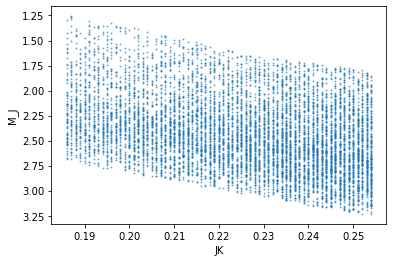

In [154]:
# plot the hr diagram of JK and M_J
gaia.viz.scatter('JK', 'M_J', s=1, alpha=0.5)
xmean = np.mean(gaia['JK'].to_numpy())
xstd = np.std(gaia['JK'].to_numpy())
xrange = xmean - 3*xstd, xmean + 3*xstd
ymean = np.mean(gaia['M_J'].to_numpy())
ystd = np.std(gaia['M_J'].to_numpy())
yrange = ymean - 3*ystd, ymean + 3*ystd
plt.gca().invert_yaxis()


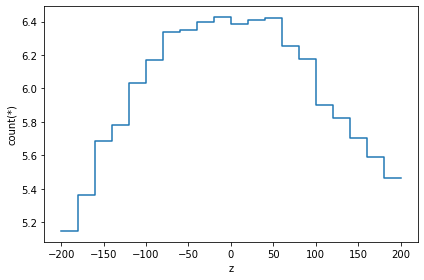

In [155]:
gaia.viz.histogram('z', shape=20, f="log")

In [153]:
# # use scipy kde to estimate the 2D kde estimate of the data
# # cut the middle plane of 30 degree
# gaia_filt = gaia.filter("abs(GLAT) > 30*3.14/180")
# gaia_filt = gaia_filt.extract()
# x = gaia_filt['JK'].to_numpy()
# y = gaia_filt['M_J'].to_numpy()
# k = gaussian_kde(np.vstack([x, y]))
# xi, yi = np.mgrid[-0.2:0.25:100j, -2:4:100j]
# zi = k(np.vstack([xi.flatten(), yi.flatten()]))

In [158]:
# use scipy kde to estimate the 2D kde estimate of the data
x = gaia['JK'].to_numpy()
y = gaia['M_J'].to_numpy()
k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[xrange[0]:xrange[1]:100j, yrange[0]:yrange[1]:100j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

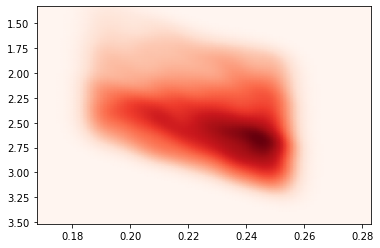

In [159]:
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.Reds)
# gaia_filt.viz.scatter('JK', 'M_J', s=1, alpha=0.1)
plt.gca().invert_yaxis()
plt.show()

In [168]:
Num = 10000
jks = np.random.uniform(xrange[0], xrange[1], Num)
mjs = np.random.uniform(yrange[0], yrange[1], Num)
Djk = xrange[1] - xrange[0]
Dmj = yrange[1] - yrange[0]
# do monte carlo integration
z = k(np.vstack([jks, mjs]))*Djk*Dmj/Num
z.sum()

0.9655389711160787

100%|██████████| 100/100 [03:32<00:00,  2.12s/it]


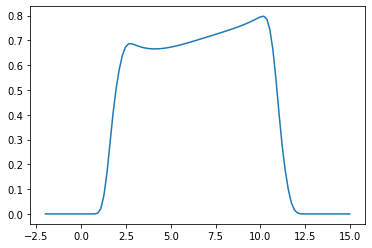

In [173]:
from tqdm import tqdm

DM = np.linspace(-2, 15, 100)

compDM = []
for dm in tqdm(DM):
    tot = k(np.vstack([jks, mjs]))*Djk*Dmj/Num*compjk(dm + mjs, jks)
    compDM.append(tot.sum())
compDM = np.array(compDM)
plt.plot(DM, compDM)
plt.show()

In [175]:
df_comp = vaex.from_arrays(DM=DM, compDM=compDM)
df_comp

#,DM,compDM
0,-2.0,0.0
1,-1.8282828282828283,0.0
2,-1.6565656565656566,0.0
3,-1.4848484848484849,0.0
4,-1.3131313131313131,0.0
...,...,...
95,14.313131313131311,0.0
96,14.484848484848484,0.0
97,14.656565656565657,0.0
98,14.828282828282827,0.0


In [176]:
df_comp.export(join(data_dir, spectral_files[index].split("/")[-1]), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     0.05s =  0.0m =  0.0h
 

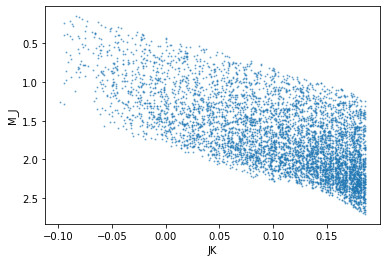

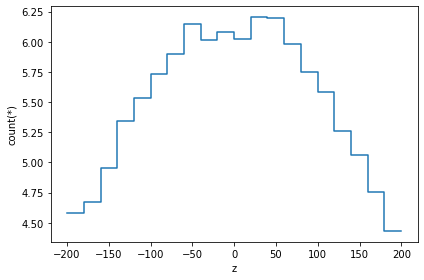

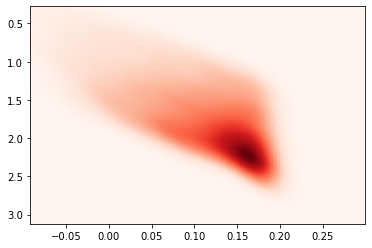

100%|██████████| 100/100 [02:23<00:00,  1.44s/it]


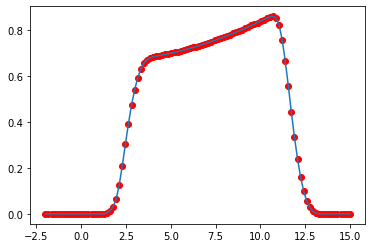

export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

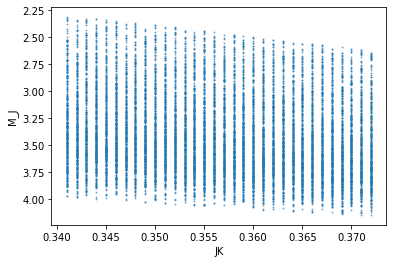

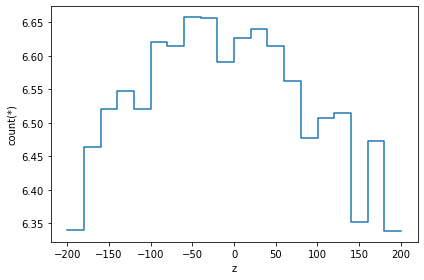

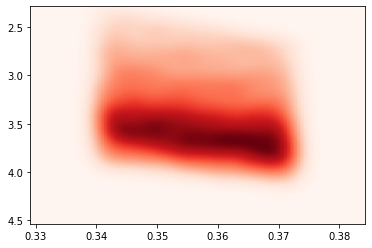

100%|██████████| 100/100 [05:33<00:00,  3.34s/it]


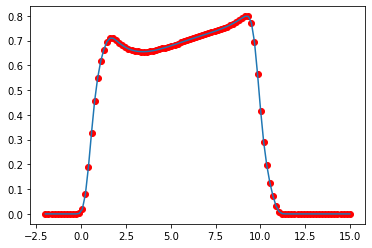

export(hdf5) [########################################] 100.00% elapsed time  :     0.04s =  0.0m =  0.0h
 

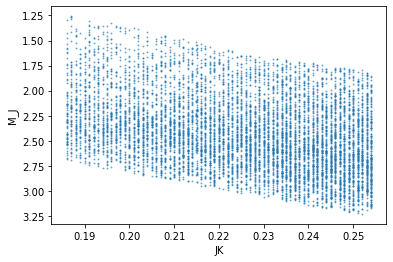

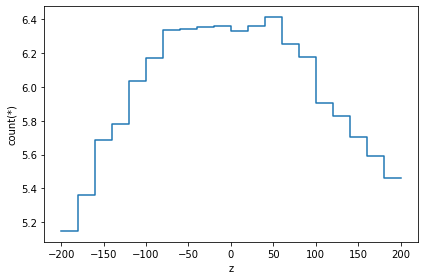

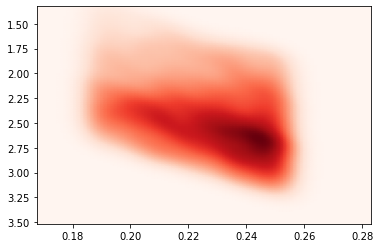

100%|██████████| 100/100 [03:26<00:00,  2.07s/it]


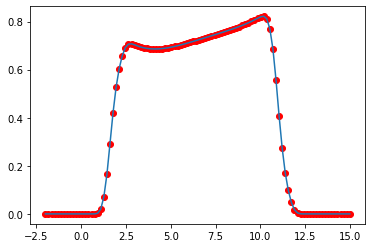

export(hdf5) [########################################] 100.00% elapsed time  :     0.04s =  0.0m =  0.0h
 

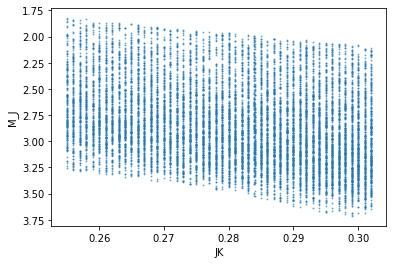

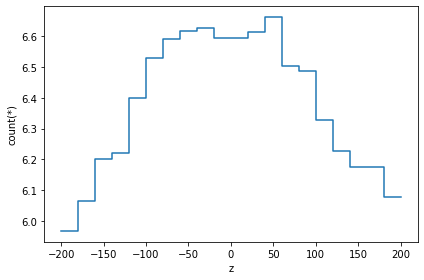

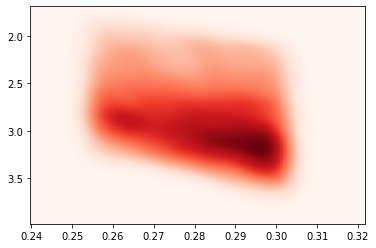

100%|██████████| 100/100 [04:54<00:00,  2.94s/it]


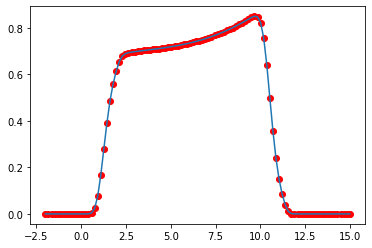

export(hdf5) [########################################] 100.00% elapsed time  :     0.04s =  0.0m =  0.0h
 

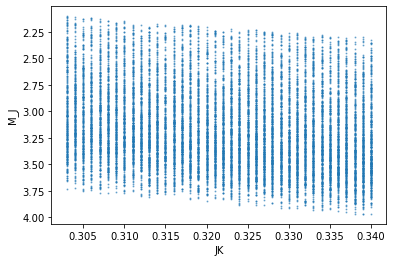

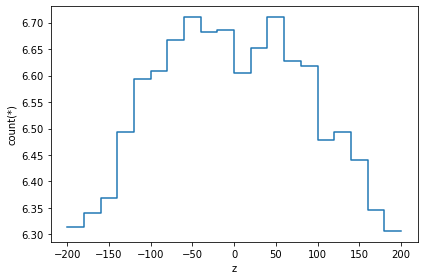

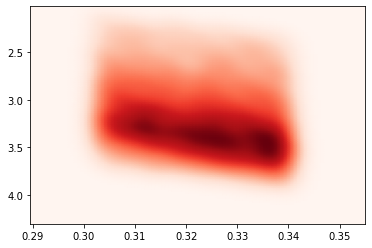

100%|██████████| 100/100 [05:30<00:00,  3.31s/it]


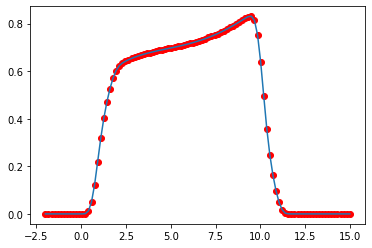

export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

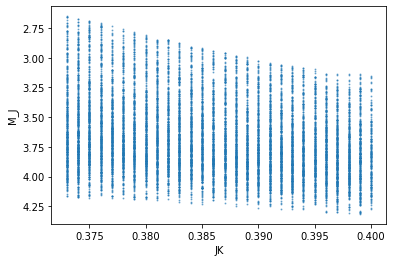

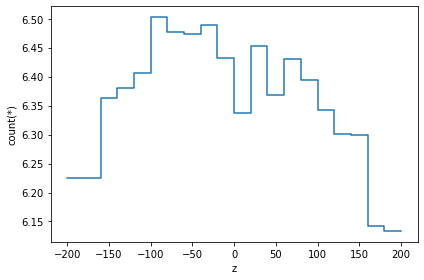

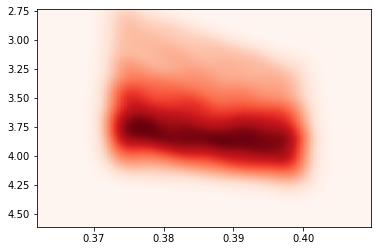

100%|██████████| 100/100 [04:35<00:00,  2.76s/it]


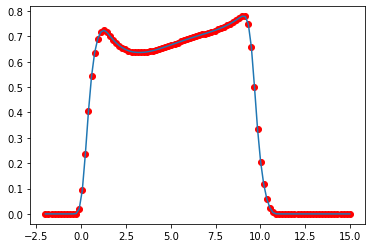

export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

In [182]:
for file in spectral_files:
    gaia_raw = vaex.open(file)
    gaia = gaia_raw.filter("Dist > 50")
    gaia = gaia.extract()

    # plot the hr diagram of JK and M_J
    xmean = np.mean(gaia['JK'].to_numpy())
    xstd = np.std(gaia['JK'].to_numpy())
    xrange = xmean - 3*xstd, xmean + 3*xstd
    ymean = np.mean(gaia['M_J'].to_numpy())
    ystd = np.std(gaia['M_J'].to_numpy())
    yrange = ymean - 3*ystd, ymean + 3*ystd

    gaia.viz.scatter('JK', 'M_J', s=1, alpha=0.5)
    plt.gca().invert_yaxis()
    plt.show()

    gaia.viz.histogram('z', shape=20, f="log", show=True)

    # use scipy kde to estimate the 2D kde estimate of the data
    x = gaia['JK'].to_numpy()
    y = gaia['M_J'].to_numpy()
    k = gaussian_kde(np.vstack([x, y]))
    xi, yi = np.mgrid[xrange[0]:xrange[1]:100j, yrange[0]:yrange[1]:100j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))

    plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.Reds)
    # gaia_filt.viz.scatter('JK', 'M_J', s=1, alpha=0.1)
    plt.gca().invert_yaxis()
    plt.show()
    # calculate effective completeness, using monte carlo integration

    Num = 10000
    jks = np.random.uniform(xrange[0], xrange[1], Num)
    mjs = np.random.uniform(yrange[0], yrange[1], Num)
    Djk = xrange[1] - xrange[0]
    Dmj = yrange[1] - yrange[0]

    DM = np.linspace(-2, 15, 100)

    compDM = []
    for dm in tqdm(DM):
        tot = k(np.vstack([jks, mjs]))*Djk*Dmj/Num*compjk(dm + mjs, jks)
        compDM.append(tot.sum())
    compDM = np.array(compDM)
    plt.plot(DM, compDM)
    plt.scatter(DM, compDM, c="r")
    plt.show()

    df_comp = vaex.from_arrays(DM=DM, compDM=compDM)
    df_comp.export(join(data_dir, file.split("/")[-1]), progress=True)